In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import minimize 
from numpy.linalg import inv

In [88]:
#seguro de clase
def neg_log_likelihood_poisson(beta, X,Y): 
    eta  = np.dot(X,beta)
    mu = np.exp(eta )
    return -np.sum(Y * eta - mu)

def neg_log_likelihood_binomial(beta, X, Y):
    eta  = np.dot(X, beta) 
    nll = -np.sum(Y * eta  - np.log(1 + np.exp(eta))) 
    return nll

def neg_log_likelihood_inv_gaussian(beta, X, Y):
    eta = np.dot(X, beta)
    mu = np.sqrt(-2/ eta)
    return -np.sum((Y - mu) ** 2 / (-2 * mu ** 2))


def neg_log_likelihood_inv_gaussian_pos(beta, X, Y):
    eta = np.dot(X, beta)
    mu = np.exp(eta)
    return -np.sum((Y - mu) ** 2 / (-2 * mu ** 2))

# def neg_log_likelihood_inv_gaussian_pos2(beta,X, Y):
#     mu = 1 / (np.dot(X, beta)**2)
#     return np.sum(0.5 * ((Y - mu)*2) / (mu*2 * Y) + 0.5 * np.log(Y))

def neg_log_likelihood_gamma(beta, X, Y):
    eta = np.dot(X, beta)
    mu = np.exp(eta)
    return - np.sum(Y * eta - mu)




#yo(?)
#usas regresion lineal normal (?
def neg_log_likelihood_normal(beta, X, Y): 
    mu = np.dot(X, beta)
    sigma = 1.0 
    return np.sum((Y - mu)**2 / (2 * sigma**2))

def neg_log_likelihood_gamma2(beta, X, Y):
    eta  = np.dot(X, beta)
    mu = 1 / eta 
    return - np.sum(Y * eta  - mu)




EJERCICIO 6

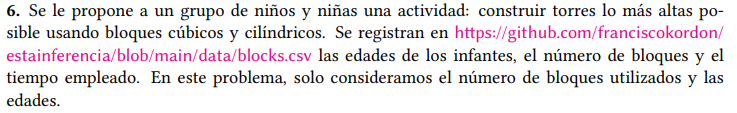

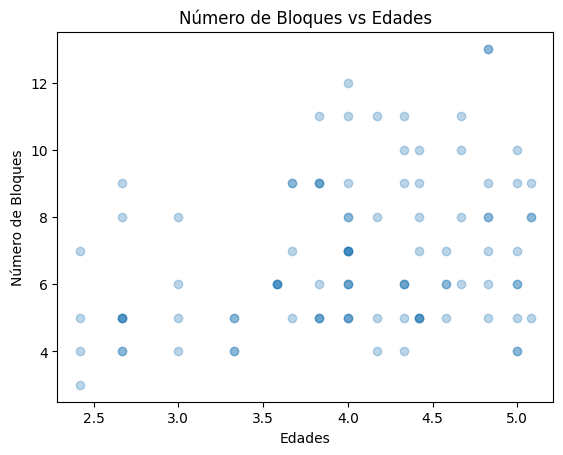

In [89]:
blocks = pd.read_csv("C:/Users/Usuario/Estadistica/Estadistica-Inferencia/2C 2024\GUIAS/blocks.csv")

plt.scatter(blocks["Age"], blocks["Number"], alpha=0.3)
plt.xlabel('Edades')
plt.ylabel('Número de Bloques')
plt.title('Número de Bloques vs Edades')
plt.show()

Propongo un modelo donde Y (numero de bloques) tiene una distribucion de Poisson. 

Esto es porque la cantidad de bloques es discreta y esta distribucion me permite obtener resultados de este tipo. 

Se plantea que el parametro theta = log(mu), ya que este es el link canonico, y mu = BX. Esto permite que el resultadop sea compatible con la imagen de una canonica

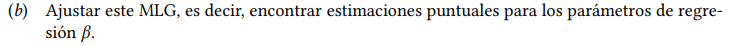

b0 =  1.3446991723048787
b1 =  0.14150964356834414


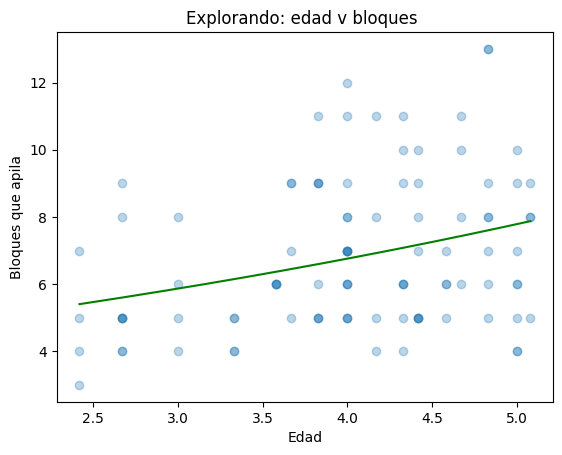

In [90]:
X = blocks["Age"].values
Y = blocks["Number"].values

intercept = np.ones(X.shape)
X_with_intercept = np.column_stack((intercept,X))

initial_beta = np.zeros(X_with_intercept.shape[1])
res_poisson = minimize(neg_log_likelihood_poisson, initial_beta, args=(X_with_intercept, Y))

b0 = res_poisson.x[0]
b1 = res_poisson.x[1]

print('b0 = ', b0)
print('b1 = ', b1)

x_range = np.linspace(X.min(), X.max(), 300)
poisson_fit = np.exp(b0 + b1 * x_range)

fig, ax = plt.subplots()
ax.scatter(X, Y, alpha=0.3)
ax.plot(x_range,poisson_fit,color='g')
ax.set_xlabel("Edad")
ax.set_ylabel("Bloques que apila")
ax.set_title("Explorando: edad v bloques ")
plt.show()

In [91]:
mu = np.exp(X_with_intercept@res_poisson.x)
W = np.diag(mu)
I = X_with_intercept.T @ W @ X_with_intercept
cov_matrix = inv(I)
cov_matrix

array([[ 0.04944116, -0.01169638],
       [-0.01169638,  0.0028516 ]])

In [92]:
se_b0 = np.sqrt(cov_matrix[0,0])
se_b1 = np.sqrt(cov_matrix[1,1])
print("se(b0) =",se_b0)
print("se(b1) =",se_b1)

se(b0) = 0.22235368540936049
se(b1) = 0.053400403764491705


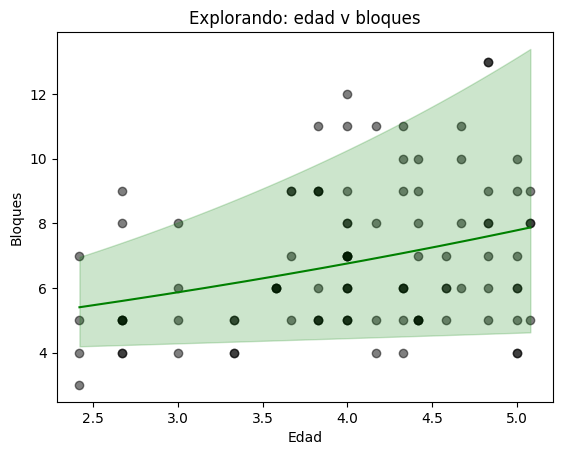

In [93]:
mu_alto = np.exp(b0 + (b1 + se_b1 *1.96) * x_range)
mu_bajo = np.exp(b0 + (b1 - se_b1 *1.96) * x_range)

fig, ax = plt.subplots()
ax.scatter(X, Y, alpha=0.5,color='k')
ax.plot(x_range,poisson_fit,color='g')
ax.fill_between(x_range, mu_bajo, mu_alto, alpha=0.2,color = 'g')

ax.set_xlabel("Edad")
ax.set_ylabel("Bloques")
ax.set_title("Explorando: edad v bloques")
plt.show()

EJERCICIO 7

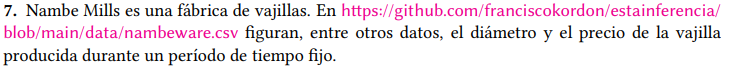

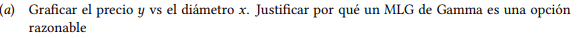

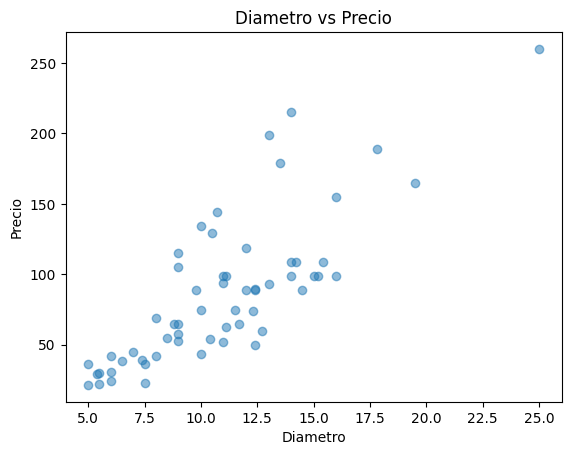

In [94]:
vajilla = pd.read_csv("C:/Users/Usuario/Estadistica/Estadistica-Inferencia/2C 2024/GUIAS/nambeware.csv")

plt.scatter(vajilla["Diam"], vajilla["Price"], alpha=0.5)
plt.xlabel('Diametro')
plt.ylabel('Precio')
plt.title('Diametro vs Precio')
plt.show()



podria plantearse un modelo gamma porqeu esta funcion permite determinar valores continuos positivos y se asemeja a una exponencial cuando lambda = 1, que es la distribucion que pareciera observarse.

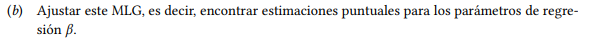

b0 =  3.06139871005504
b1 =  0.13110933392747381


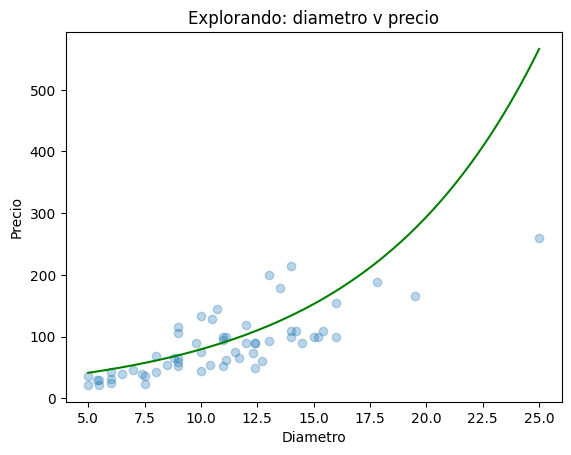

In [95]:
X = vajilla["Diam"].values
Y = vajilla["Price"].values

intercept = np.ones(X.shape)
X_with_intercept = np.column_stack((intercept,X))

initial_beta = np.zeros(X_with_intercept.shape[1])
res_gamma = minimize(neg_log_likelihood_inv_gaussian_pos, initial_beta, args=(X_with_intercept, Y))

b0 = res_gamma.x[0]
b1 = res_gamma.x[1]

print('b0 = ', b0)
print('b1 = ', b1)

x_range = np.linspace(X.min(), X.max(), 300)
gamma_fit = np.exp(b0 + b1 * x_range)

fig, ax = plt.subplots()
ax.scatter(X, Y, alpha=0.3)
ax.plot(x_range,gamma_fit,color='g')
ax.set_xlabel("Diametro")
ax.set_ylabel("Precio")
ax.set_title("Explorando: diametro v precio")
plt.show()

EJERCICIO 8

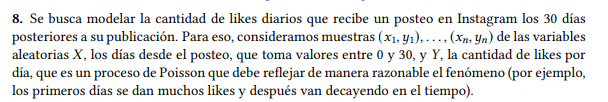

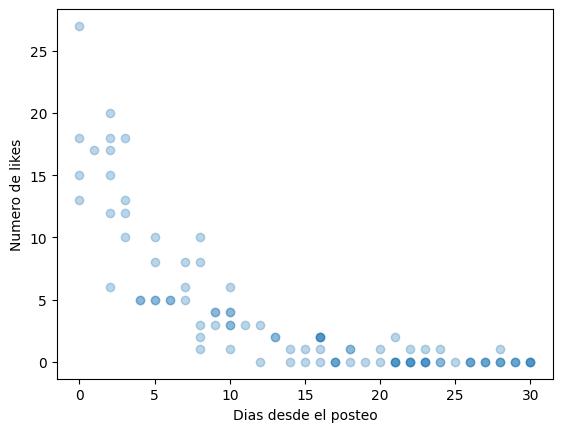

In [96]:
n = 100

X = np.random.randint(0, 31, n)
Y = np.random.poisson(20 * np.exp(-0.2*X) ,n) 

plt.scatter(X,Y, alpha=0.3)
plt.xlabel("Dias desde el posteo")
plt.ylabel("Numero de likes")
plt.show()

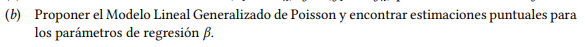

b0 =  2.9976971092613307
b1 =  -0.19189947328328347


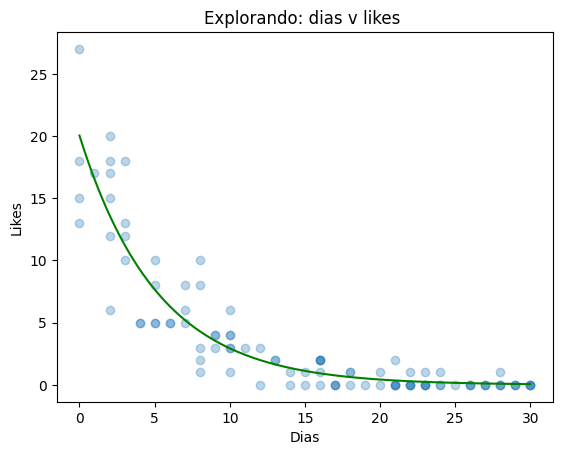

In [97]:
intercept = np.ones(X.shape)
X_with_intercept = np.column_stack((intercept,X))

initial_beta = np.zeros(X_with_intercept.shape[1])
res_poisson = minimize(neg_log_likelihood_poisson, initial_beta, args=(X_with_intercept, Y))

b0 = res_poisson.x[0]
b1 = res_poisson.x[1]

print('b0 = ', b0)
print('b1 = ', b1)

x_range = np.linspace(X.min(), X.max(), 300)
poisson_fit = np.exp(b0 + b1 * x_range)

fig, ax = plt.subplots()
ax.scatter(X, Y, alpha=0.3)
ax.plot(x_range,poisson_fit,color='g')
ax.set_xlabel("Dias")
ax.set_ylabel("Likes")
ax.set_title("Explorando: dias v likes ")
plt.show()

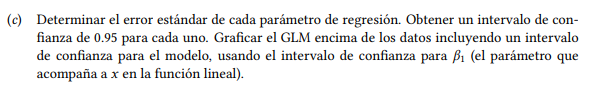

[[ 0.00483724 -0.0005    ]
 [-0.0005      0.00011195]]
se(b0) = 0.06955027816422538
se(b1) = 0.01058080577995618


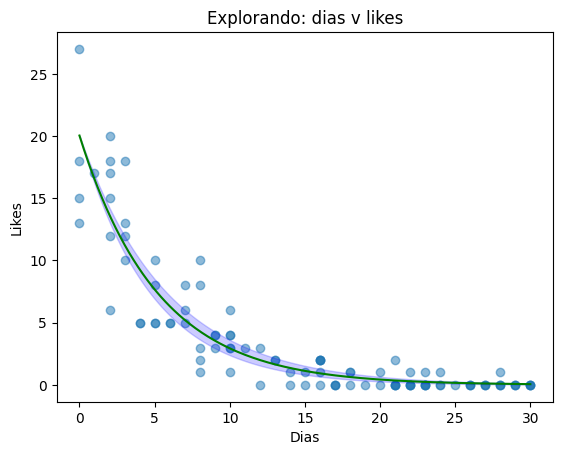

In [98]:
mu = np.exp(X_with_intercept @ res_poisson.x)
W = np.diag(mu) #pesos
I = X_with_intercept.T @ W @ X_with_intercept #fisher
cov_matrix = inv(I)
print(cov_matrix)

se_b0 = np.sqrt(cov_matrix[0,0])
se_b1 = np.sqrt(cov_matrix[1,1])
print("se(b0) =",se_b0)
print("se(b1) =",se_b1)

mu_alto = np.exp(b0 + (b1 + se_b1 *1.96) * x_range)
mu_bajo = np.exp(b0 + (b1 - se_b1 *1.96) * x_range)

fig, ax = plt.subplots()
ax.scatter(X, Y, alpha=0.5)
ax.plot(x_range,poisson_fit,color='g')
ax.fill_between(x_range, mu_bajo, mu_alto, alpha=0.2,color = 'b')

ax.set_xlabel("Dias")
ax.set_ylabel("Likes")
ax.set_title("Explorando: dias v likes")
plt.show()